c:\Users\ROBERTA\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
Mean Squared Error: 294748267251309.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


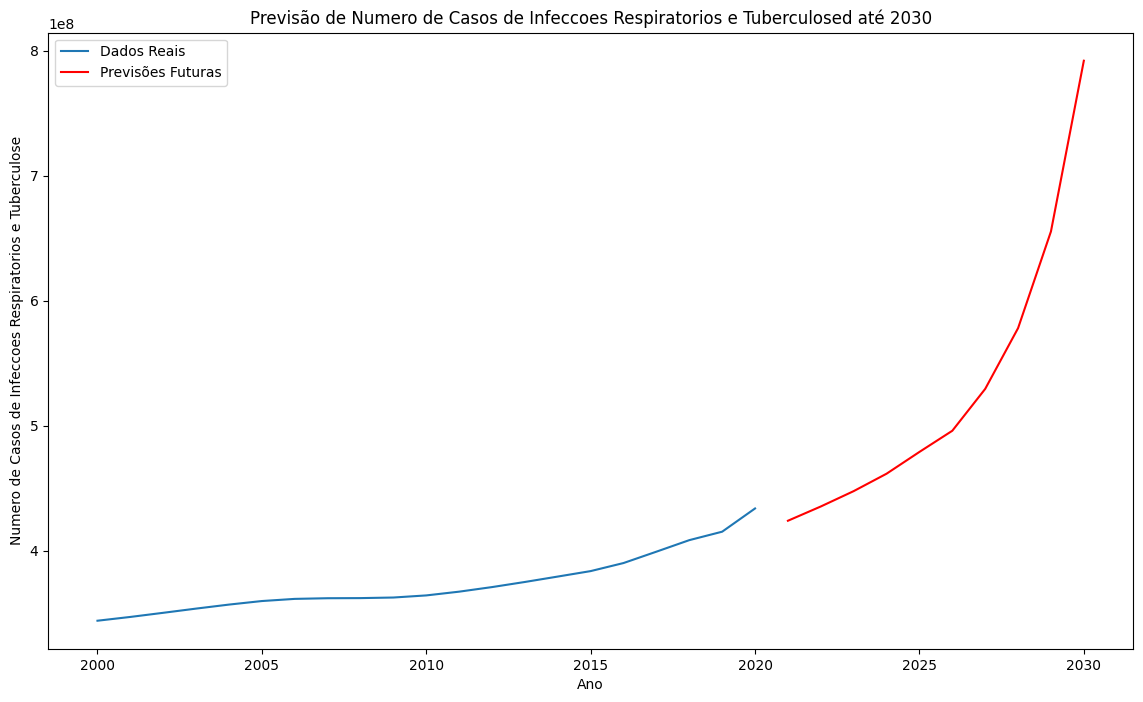

Anos Futuras: [2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]
Previsões Futuras: [4.2383987e+08 4.3525296e+08 4.4754266e+08 4.6147290e+08 4.7890666e+08
 4.9584099e+08 5.2932710e+08 5.7794451e+08 6.5530406e+08 7.9189050e+08]


In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# Dados
data = {
    'Ano': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 
            2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    "Numero de Casos de Infeccoes Respiratorios e Tuberculose": [343852698,
                                                                    346882409,
                                                                    350185460,
                                                                    353551654,
                                                                    356764343,
                                                                    359597092,
                                                                    361324616,
                                                                    361851012,
                                                                    361946617,
                                                                    362414226,
                                                                    364100248,
                                                                    367102168,
                                                                    370763239,
                                                                    374855408,
                                                                    379185316,
                                                                    383553623,
                                                                    390006960,
                                                                    399097928,
                                                                    408321238,
                                                                    415080816,
                                                                    433666580]
}

# Convertendo os dados para um DataFrame
df = pd.DataFrame(data)

# Configurações
n_steps = 5  # Número de passos de tempo para olhar para trás

# Função para criar os conjuntos de dados de treinamento e teste
def create_dataset(series, n_steps):
    X, y = [], []
    for i in range(len(series) - n_steps):
        X.append(series[i:i + n_steps])
        y.append(series[i + n_steps])
    return np.array(X), np.array(y)

# Normalizando os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Numero de Casos de Infeccoes Respiratorios e Tuberculose']].values)

# Criando os conjuntos de dados
X, y = create_dataset(scaled_data, n_steps)

# Dividindo em conjunto de treinamento e teste
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape para o LSTM [amostras, passos de tempo, características]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Modelo LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Treinando o modelo
history = model.fit(X_train, y_train, epochs=200, verbose=0, validation_split=0.1)

# Fazendo previsões
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculando o erro
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Previsão futura
last_sequence = scaled_data[-n_steps:]  # Pegando a última sequência para previsão
predictions = []

for _ in range(10):  # Prever os próximos 10 anos
    last_sequence = last_sequence.reshape((1, n_steps, 1))  # Ajustando o formato para o modelo
    next_value = model.predict(last_sequence)  # Prevendo o próximo valor
    predictions.append(next_value[0, 0])
    # Atualizando a sequência removendo o primeiro valor e adicionando o próximo valor previsto
    last_sequence = np.concatenate((last_sequence[:, 1:, :], np.expand_dims(next_value, axis=1)), axis=1)

# Convertendo as previsões para o formato original
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Plotando os resultados
plt.figure(figsize=(14, 8))
plt.plot(df['Ano'], df['Numero de Casos de Infeccoes Respiratorios e Tuberculose'], label='Dados Reais')
future_years = list(range(2021, 2031))
plt.plot(future_years, predictions, label='Previsões Futuras', color='red')
plt.xlabel('Ano')
plt.ylabel('Numero de Casos de Infeccoes Respiratorios e Tuberculose')
plt.title('Previsão de Numero de Casos de Infeccoes Respiratorios e Tuberculosed até 2030')
plt.legend()
plt.show()

# Exibindo os valores
future_years = list(range(2021, 2031))
print("Anos Futuras:", future_years)
print("Previsões Futuras:", predictions.flatten())


c:\Users\ROBERTA\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
Mean Squared Error: 126733663377483.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


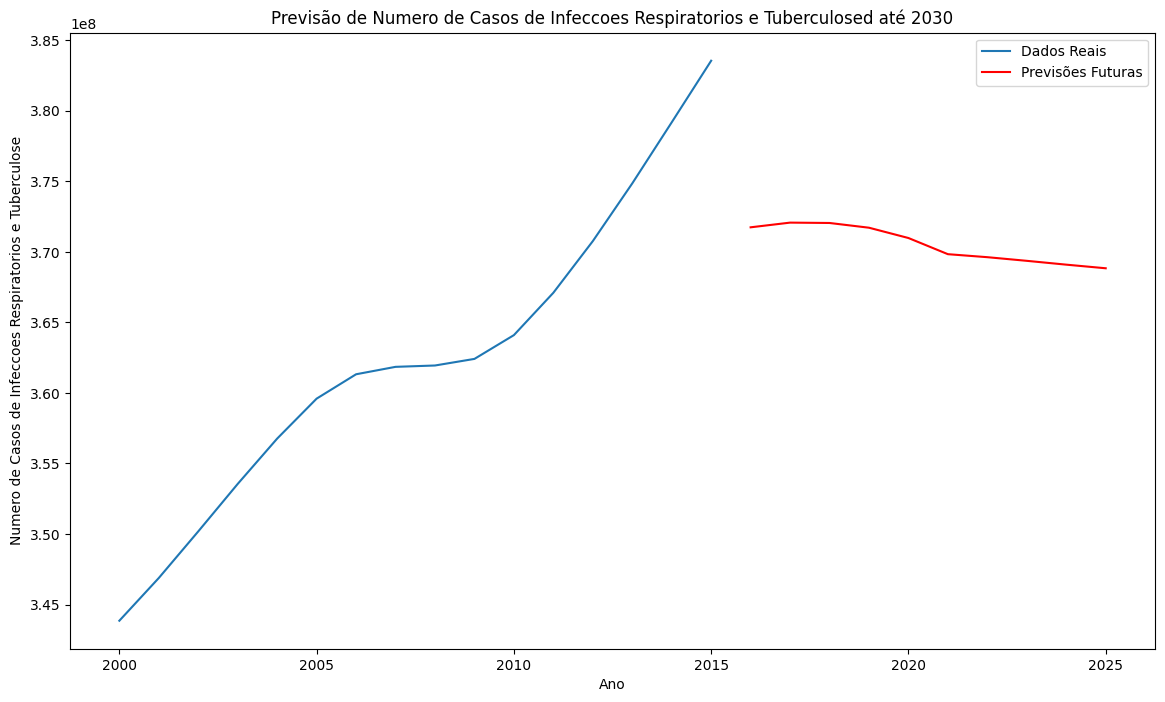

Anos Futuras: [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]
Previsões Futuras: [3.7174317e+08 3.7207574e+08 3.7205046e+08 3.7171485e+08 3.7098438e+08
 3.6983837e+08 3.6962547e+08 3.6936694e+08 3.6909594e+08 3.6883968e+08]


In [26]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# Dados
data = {
    'Ano': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 
            2010, 2011, 2012, 2013, 2014, 2015],
    "Numero de Casos de Infeccoes Respiratorios e Tuberculose": [343852698,
                                                                    346882409,
                                                                    350185460,
                                                                    353551654,
                                                                    356764343,
                                                                    359597092,
                                                                    361324616,
                                                                    361851012,
                                                                    361946617,
                                                                    362414226,
                                                                    364100248,
                                                                    367102168,
                                                                    370763239,
                                                                    374855408,
                                                                    379185316,
                                                                    383553623]
}

# Convertendo os dados para um DataFrame
df = pd.DataFrame(data)

# Configurações
n_steps = 5  # Número de passos de tempo para olhar para trás

# Função para criar os conjuntos de dados de treinamento e teste
def create_dataset(series, n_steps):
    X, y = [], []
    for i in range(len(series) - n_steps):
        X.append(series[i:i + n_steps])
        y.append(series[i + n_steps])
    return np.array(X), np.array(y)

# Normalizando os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Numero de Casos de Infeccoes Respiratorios e Tuberculose']].values)

# Criando os conjuntos de dados
X, y = create_dataset(scaled_data, n_steps)

# Dividindo em conjunto de treinamento e teste
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape para o LSTM [amostras, passos de tempo, características]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Modelo LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Treinando o modelo
history = model.fit(X_train, y_train, epochs=500, verbose=0, validation_split=0.1)

# Fazendo previsões
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculando o erro
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Previsão futura
last_sequence = scaled_data[-n_steps:]  # Pegando a última sequência para previsão
predictions = []

for _ in range(10):  # Prever os próximos 10 anos
    last_sequence = last_sequence.reshape((1, n_steps, 1))  # Ajustando o formato para o modelo
    next_value = model.predict(last_sequence)  # Prevendo o próximo valor
    predictions.append(next_value[0, 0])
    # Atualizando a sequência removendo o primeiro valor e adicionando o próximo valor previsto
    last_sequence = np.concatenate((last_sequence[:, 1:, :], np.expand_dims(next_value, axis=1)), axis=1)

# Convertendo as previsões para o formato original
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Plotando os resultados
plt.figure(figsize=(14, 8))
plt.plot(df['Ano'], df['Numero de Casos de Infeccoes Respiratorios e Tuberculose'], label='Dados Reais')
future_years = list(range(2016, 2026))
plt.plot(future_years, predictions, label='Previsões Futuras', color='red')
plt.xlabel('Ano')
plt.ylabel('Numero de Casos de Infeccoes Respiratorios e Tuberculose')
plt.title('Previsão de Numero de Casos de Infeccoes Respiratorios e Tuberculosed até 2030')
plt.legend()
plt.show()

# Exibindo os valores
future_years = list(range(2016, 2026))
print("Anos Futuras:", future_years)
print("Previsões Futuras:", predictions.flatten())